In [2]:
import os
import deepchem as dc
import numpy as np
#from deepchem.molnet import load_qm9

import matplotlib.pyplot as plt
import random 

In [3]:
from deepchem.molnet import load_qm9

qm9_tasks, datasets, transformers = load_qm9()
train_dataset, valid_dataset, test_dataset = datasets

In [31]:
load_qm9

<function deepchem.molnet.load_function.qm9_datasets.load_qm9(featurizer: Union[deepchem.feat.base_classes.Featurizer, str] = CoulombMatrix[max_atoms=29, remove_hydrogens=False, randomize=False, upper_tri=False, n_samples=1, seed=None], splitter: Union[deepchem.splits.splitters.Splitter, str, NoneType] = 'random', transformers: List[Union[deepchem.molnet.load_function.molnet_loader.TransformerGenerator, str]] = ['normalization'], reload: bool = True, data_dir: Union[str, NoneType] = None, save_dir: Union[str, NoneType] = None, **kwargs) -> Tuple[List[str], Tuple[deepchem.data.datasets.Dataset, ...], List[transformers.Transformer]]>

In [36]:
Tuple = load_qm9()
Tuple[mu]

['mu',
 'alpha',
 'homo',
 'lumo',
 'gap',
 'r2',
 'zpve',
 'cv',
 'u0',
 'u298',
 'h298',
 'g298']

In [4]:
datasets

(<DiskDataset X.shape: (105984, 29, 29), y.shape: (105984, 12), w.shape: (105984, 12), task_names: ['mu' 'alpha' 'homo' ... 'u298' 'h298' 'g298']>,
 <DiskDataset X.shape: (13248, 29, 29), y.shape: (13248, 12), w.shape: (13248, 12), task_names: ['mu' 'alpha' 'homo' ... 'u298' 'h298' 'g298']>,
 <DiskDataset X.shape: (13248, 29, 29), y.shape: (13248, 12), w.shape: (13248, 12), task_names: ['mu' 'alpha' 'homo' ... 'u298' 'h298' 'g298']>)

In [5]:
print(test_dataset)

<DiskDataset X.shape: (13248, 29, 29), y.shape: (13248, 12), w.shape: (13248, 12), task_names: ['mu' 'alpha' 'homo' ... 'u298' 'h298' 'g298']>


In [20]:
# matlab method: single_noise = awgn(signal, SNR, 'measured')

SNR = 5
signal = np.random.randn(512,512)*SNR
noise = np.random.randn(signal.shape[0],signal.shape[1]) 	#产生N(0,1)噪声数据
noise = noise-np.mean(noise) 								#均值为0

signal_power = np.linalg.norm( signal - signal.mean() )**2 / signal.size	#此处是信号的std**2
noise_variance = signal_power/np.power(10,(SNR/10))         #此处是噪声的std**2
noise = (np.sqrt(noise_variance) / np.std(noise) )*noise    ##此处是噪声的std**2
signal_noise = noise + signal

Ps = ( np.linalg.norm(signal - signal.mean()) )**2          #signal power
Pn = ( np.linalg.norm(signal - signal_noise ) )**2          #noise power
snr = 10*np.log10(Ps/Pn)

In [17]:
signal_power = np.linalg.norm( signal )**2
noise_variance = signal_power/np.power(10,(SNR/10))
noise = np.sqrt(noise_variance)*noise + 0

NameError: name 'signal' is not defined

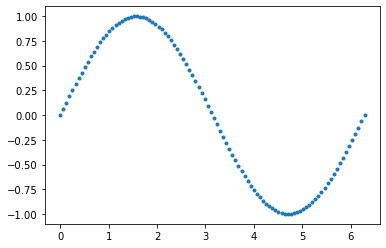

In [6]:
X = np.linspace(0,2*np.pi,100,endpoint=True)
Y = np.sin(X)

plt.plot(X,Y,linestyle='',marker='.')
plt.show()

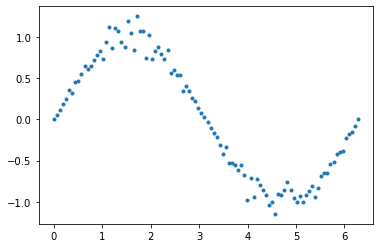

In [7]:
X = np.linspace(0,2*np.pi,100,endpoint=True)
Y = np.sin(X)
mu = 0
sigma = 0.12*np.sin(X)

for i in range(X.size):    
    Y[i] += random.gauss(mu,sigma[i])
 
plt.plot(X,Y,linestyle='',marker='.')
plt.show()

* extend to 2D input x1 and x2

In [8]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

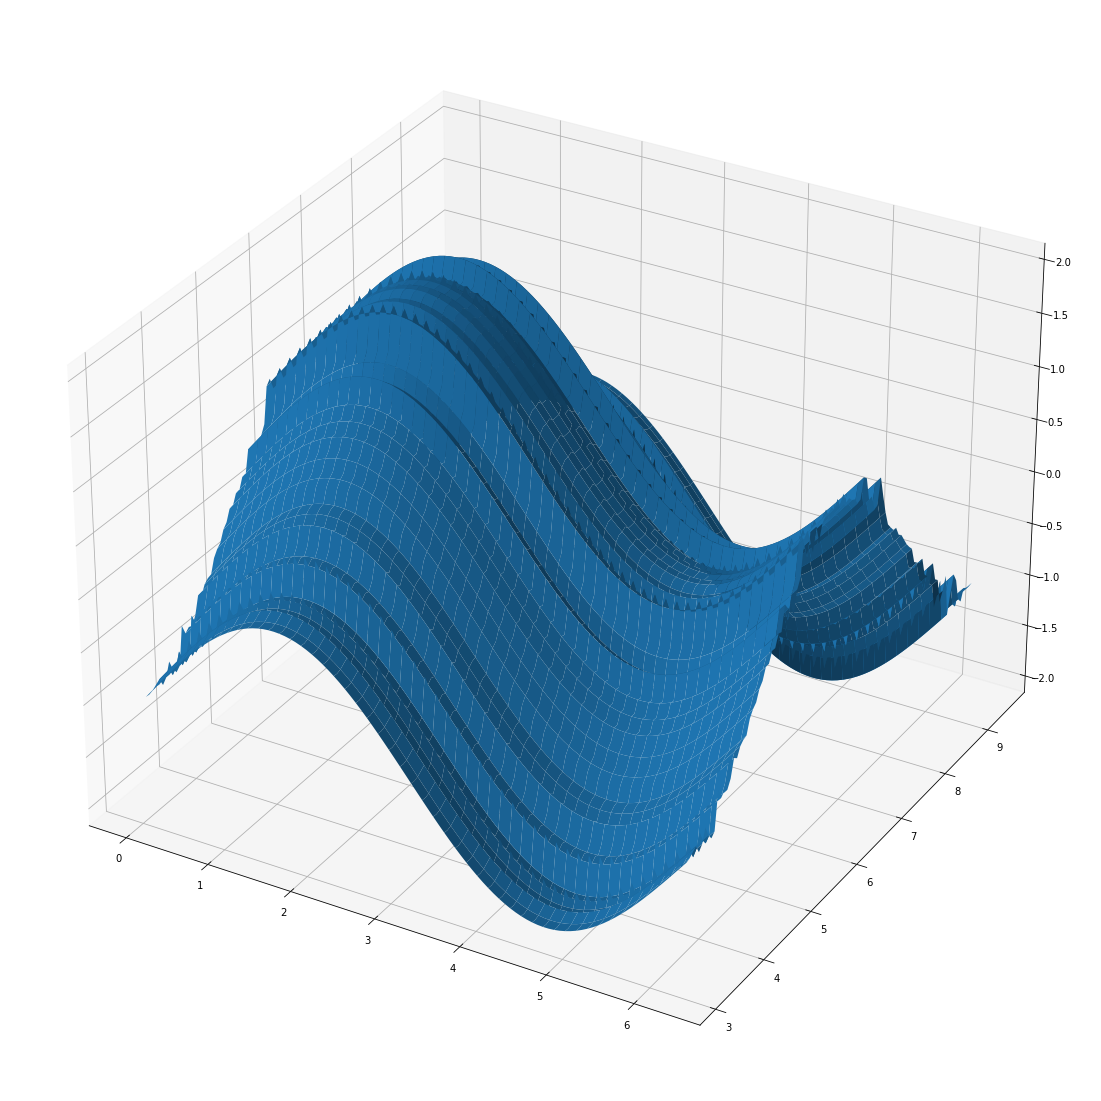

In [9]:
X1i = np.linspace(0, 2*np.pi, 100, endpoint=True)
X2i = np.linspace(np.pi, 3*np.pi, 100, endpoint=True)
X1,X2 = np.meshgrid(X1i, X2i)
Y = np.sin(X1) + np.cos(X2)
mu = 0
sigma = 0.12*np.sin(X1i + X2i)
for i in range(X1i.size):    
    Y[i] += random.gauss(mu,sigma[i]) 
fig = plt.figure(figsize = (20,20))
ax = fig.gca(projection = '3d')
ax.plot_surface(X1,X2,Y)

In [10]:
import numpy as np
import random
from matplotlib import pyplot as plt
from deepchem.molnet import load_qm9

In [12]:
qm9_tasks, datasets, transformers = load_qm9()
train_dataset, valid_dataset, test_dataset = datasets

In [13]:
valid_dataset

<DiskDataset X.shape: (13248, 29, 29), y.shape: (13248, 12), w.shape: (13248, 12), task_names: ['mu' 'alpha' 'homo' ... 'u298' 'h298' 'g298']>

In [14]:
test_dataset.X.shape

(13248, 29, 29)

In [15]:
X = test_reshaped = test_dataset.X.reshape((-1, 29*29))

In [43]:
X.shape

(13248, 841)

In [37]:
test_reshaped.shape

(13248, 841)

In [ ]:
X1i = np.linspace(0, 2*np.pi, 100, endpoint=True)
X2i = np.linspace(np.pi, 3*np.pi, 100, endpoint=True)
X1,X2 = np.meshgrid(X1i, X2i)
Y = np.sin(X1) + np.cos(X2)
mu = 0
sigma = 0.12*np.sin(X1i + X2i)
for i in range(X1i.size):    
    Y[i] += random.gauss(mu,sigma[i]) 
fig = plt.figure(figsize = (20,20))
ax = fig.gca(projection = '3d')
ax.plot_surface(X1,X2,Y)

In [40]:
def add_gasuss_noise(X, x1, mean=0, var=0.001):
    shape = np.array(X.shape, dtype=float)
    for i in range(X1i.size):    
        noise = np.random.normal(mean, var ** 0.5, shape)
        out[i] = X[i] + noise

    return out

In [42]:
y = add_gasuss_noise(X, mean=0, var=0.001)

In [44]:
y.shape

(1,)

In [39]:
#np.savetxt(r'g:\test.csv',test_reshaped.shape,delimiter=',', fmt=('%s, %f'))

In [ ]:
def sp_noise(X,prob):

    '''

    add salt peper noise

    prob:ratio of noise

    '''

    output = np.zeros(X.shape)

    thres = 1 - prob

    for i in range(X.shape[0]):

        for j in range(X.shape[1]):

            rdn = random.random()

            if rdn < prob:

                output[i][j] = 0

            elif rdn > thres:

                output[i][j] = 255

            else:

                output[i][j] = image[i][j]

    return output

def gasuss_noise(X, mean=0, var=0.001):

    X = np.array(X.shape, dtype=float)

    noise = np.random.normal(mean, var ** 0.5, X.shape)

    out = X + noise

    #cv.imshow("gasuss", out)

    return out

# Read image

img = cv2.imread("../paojie.jpg")

# 添加椒盐噪声，噪声比例为 0.02

out1 = sp_noise(img, prob=0.02)

# 添加高斯噪声，均值为0，方差为0.001

out2 = gasuss_noise(img, mean=0, var=0.001)

# 显示图像

plt.figure(1)

plt.subplot(131)

plt.axis('off')  # 关闭坐标轴

plt.title('Original')

plt.imshow(img)

plt.subplot(132)

plt.axis('off')

plt.title('Add Salt and Pepper noise')

plt.imshow(out1)

plt.subplot(133)

plt.axis('off')

plt.title('Add Gaussian noise')

plt.imshow(out2)

plt.show()